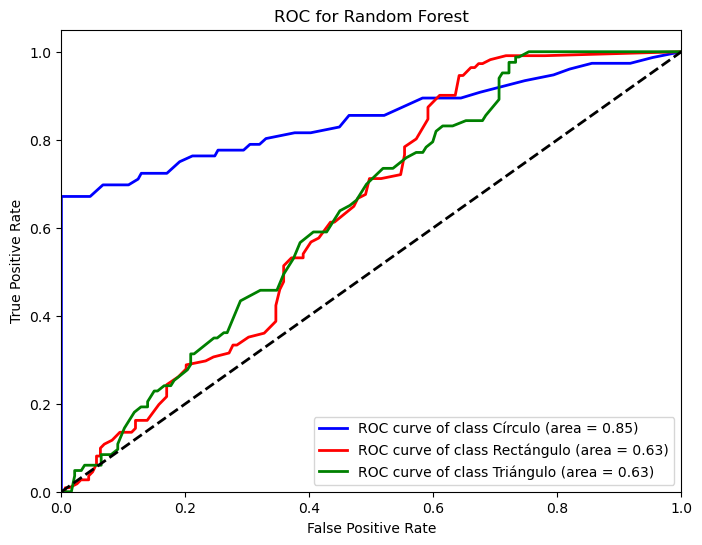

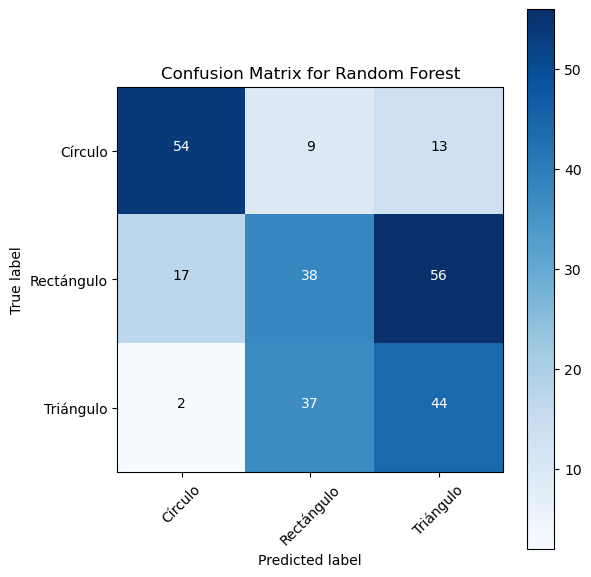

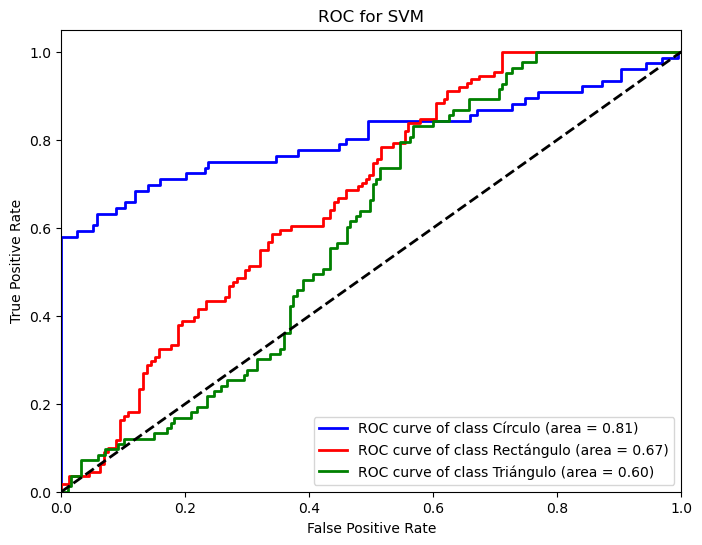

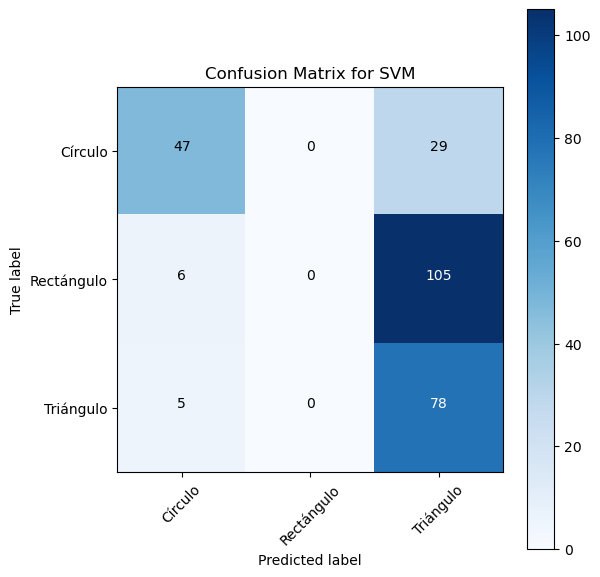

/Users/braulioalejandronavarretehorta/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/var/folders/5r/34tx8b0x3931dyytlf7k3dxh0000gn/T/ipykernel_8133/2955021116.py:129: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  ]).hide_index()


Metric,Random Forest,SVM
Accuracy,50.37%,46.30%
Precision,52.72%,39.28%
Recall,52.77%,51.94%
AUC,70.49%,69.17%


Both models show comparable performance.


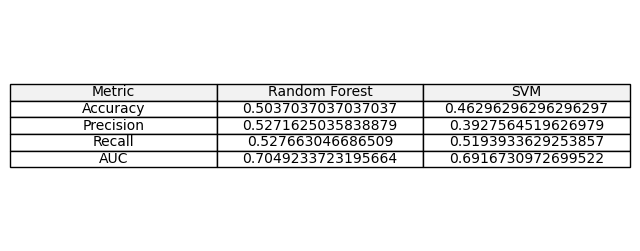

Both models show comparable performance.


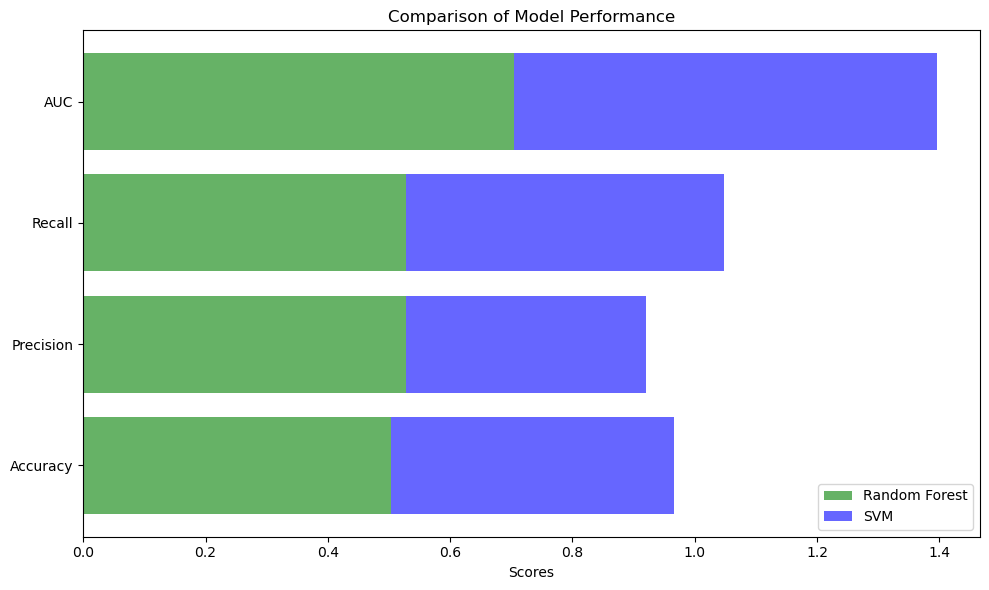

Both models show comparable performance.


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

# Cargando el archivo CSV
# Asegúrate de tener el archivo CSV en el mismo directorio que este notebook
pd.set_option('display.max_rows', None)
data = pd.read_csv('./shapes_data.csv')

# Preparando los datos
X = data[['area', 'perimeter']]  # Características
y = data['Figura']               # Etiquetas

# Codificación de las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividiendo los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Entrenando los modelos
# Modelo 1: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Modelo 2: Support Vector Machine (SVM)
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Función para calcular y mostrar la curva ROC y la matriz de confusión
def evaluate_model(model, X_test, y_test, model_name):
    # [El código de la función se mantiene igual hasta el cálculo de la matriz de confusión]
    # Predicciones y probabilidades
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)

    # Curva ROC para cada clase
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(label_encoder.classes_)
    y_test_bin = label_binarize(y_test, classes=range(n_classes))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Dibujando la curva ROC para cada clase
    plt.figure(figsize=(8, 6))
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of class {label_encoder.classes_[i]} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {model_name}')
    plt.legend(loc="lower right")
    plt.show()

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.colorbar()
    ticks = np.arange(len(label_encoder.classes_))
    plt.xticks(ticks, label_encoder.classes_, rotation=45)
    plt.yticks(ticks, label_encoder.classes_)

    # Etiquetas de números en las celdas
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, cm[i, j], horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


    # [Después de la matriz de confusión, agregamos el cálculo de las métricas de rendimiento]
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    accuracy = accuracy_score(y_test, y_pred)

    performance_metrics = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'AUC': roc_auc
    }

    return performance_metrics

# Evaluación de modelos
rf_performance = evaluate_model(rf_model, X_test, y_test, "Random Forest")
svm_performance = evaluate_model(svm_model, X_test, y_test, "SVM")

# Crear una tabla de comparación
comparison_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'AUC'],
    'Random Forest': [rf_performance['Accuracy'], rf_performance['Precision'].mean(), rf_performance['Recall'].mean(), np.mean(list(rf_performance['AUC'].values()))],
    'SVM': [svm_performance['Accuracy'], svm_performance['Precision'].mean(), svm_performance['Recall'].mean(), np.mean(list(svm_performance['AUC'].values()))]
})

# Estilizar y mostrar la tabla de comparación
styled_table = comparison_table.style.format({
    'Random Forest': '{:.2%}',
    'SVM': '{:.2%}'
}).set_table_styles([  # Establece el estilo de la tabla
    {'selector': 'th', 'props': [('font-size', '12pt'), ('text-align', 'center')]},
    {'selector': 'td', 'props': [('text-align', 'center')]},
    {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#f2f2f2')]},
    {'selector': 'tr:nth-of-type(even)', 'props': [('background-color', '#ffffff')]},
    {'selector': 'th:nth-of-type(1)', 'props': [('min-width', '150px')]}
]).hide_index()

display(styled_table)

# Interpretar los resultados de manera dinámica
def interpret_results(table):
    rf_better = table['Random Forest']['Accuracy'] > table['SVM']['Accuracy']
    svm_better = table['SVM']['Accuracy'] > table['Random Forest']['Accuracy']

    if rf_better and (table['Random Forest']['AUC'] - table['SVM']['AUC'] > 0.05):
        interpretation = "Random Forest significantly outperforms SVM."
    elif svm_better and (table['SVM']['AUC'] - table['Random Forest']['AUC'] > 0.05):
        interpretation = "SVM significantly outperforms Random Forest."
    else:
        interpretation = "Both models show comparable performance."

    return interpretation

interpretation = interpret_results(comparison_table.set_index('Metric').T.to_dict('index'))
print(interpretation)

# Gráfico de la tabla de rendimiento
def plot_performance_table(table):
    fig, ax = plt.subplots(figsize=(8, 3))
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table.values,
             colLabels=table.columns,
             loc='center',
             cellLoc='center',
             colColours=["#f2f2f2"]*len(table.columns))
    plt.show()

plot_performance_table(comparison_table)

# Imprimir interpretación
print(interpretation)

# Transformar la tabla para la visualización de la gráfica de barras
comparison_table_melted = comparison_table.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Dibujar las barras
for i, metric in enumerate(comparison_table['Metric']):
    rf_score = comparison_table_melted[(comparison_table_melted['Metric'] == metric) & (comparison_table_melted['Model'] == 'Random Forest')]['Score'].values[0]
    svm_score = comparison_table_melted[(comparison_table_melted['Metric'] == metric) & (comparison_table_melted['Model'] == 'SVM')]['Score'].values[0]
    ax.barh(metric, rf_score, color='green', alpha=0.6, label='Random Forest' if i == 0 else "")
    ax.barh(metric, svm_score, left=rf_score, color='blue', alpha=0.6, label='SVM' if i == 0 else "")

ax.set_xlabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.legend()

# Mostrar la gráfica de barras
plt.tight_layout()
plt.show()

# Imprimir interpretación
print(interpretation)